# Fidelity-based quality assessment

Author:  Daniel Proaño-Guevara

PRODEB

### Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import pickle

import preprocessing_lib as pplib
import feature_extraction_lib as ftelib

## Initial signals with their segmentation-delineation

### Phonocardiography (PCG)

ULSGE Dataset

In [ ]:
root_dir = r'..\DatasetCHVNGE\pcg_ulsge.pkl'
pcg_df = pd.read_pickle(root_dir)
# Resample them to 50 Hz
pcg_df['Signal'] = pcg_df['Signal'].apply(
    lambda data: pplib.downsample(data, 3000, 50))

# Import Predictions
pred_path = r'..\ULSGE_pred_butter.pkl'
with open(pred_path, 'rb') as file:
    pcg_predictions = pickle.load(file)

### Show Raw Predictions

C:\Users\danie\AppData\Local\Temp\ipykernel_36244\3557005574.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(pplib.min_max_norm2(df.iloc[63][2])[300:700], label = 'PCG raw')


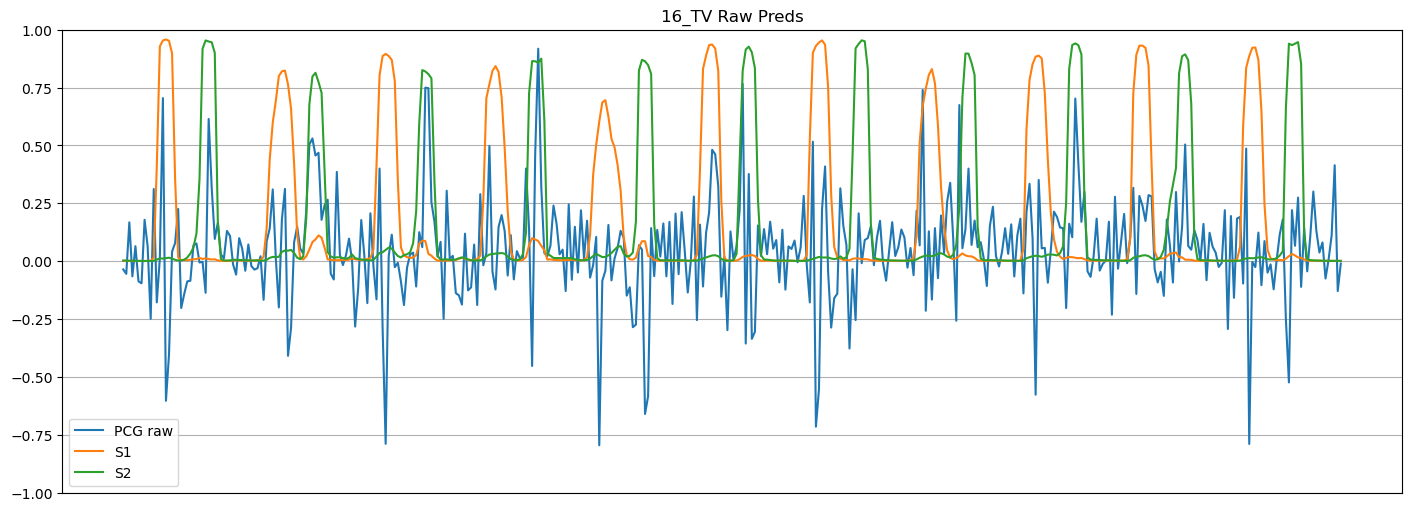

In [ ]:
plt.figure(layout='constrained', figsize=(14,5))
plt.title('16_TV Raw Preds PCG')
plt.plot(pplib.min_max_norm2(pcg_df.iloc[63][2])[300:700], label = 'PCG raw')
plt.plot(pcg_predictions[63][300:700, 0], label='S1')
plt.plot(pcg_predictions[63][300:700, 2], label='S2')
plt.xticks([])
plt.ylim(-1, 1)
plt.legend(loc=3)
plt.grid()
plt.show()

### Smooth Predictions

In [ ]:
AVERAGE_WINDOW = 3
pcg_processed_predictions = [
    np.column_stack([pplib.moving_average(data[:, i], AVERAGE_WINDOW) for i in range(4)])
    for data in pcg_predictions
]

C:\Users\danie\AppData\Local\Temp\ipykernel_36244\255384594.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(pplib.min_max_norm2(df.iloc[63][2])[300:700], label = 'PCG raw')


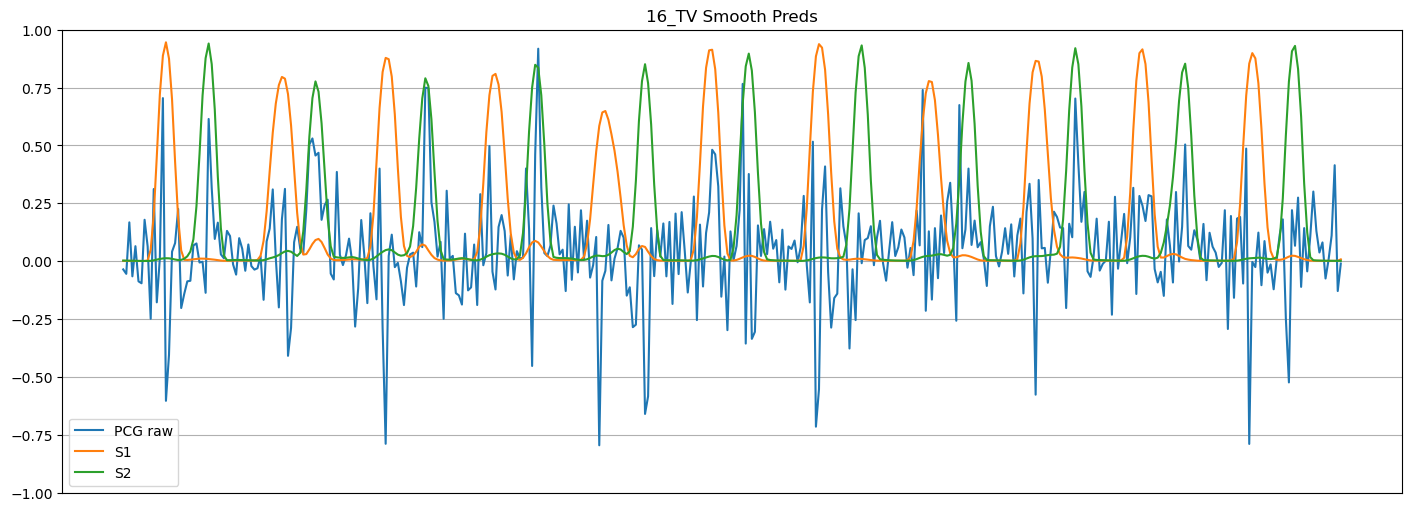

In [ ]:
plt.figure(layout='constrained', figsize=(14,5))
plt.title('16_TV Smooth Preds PCG')
plt.plot(pplib.min_max_norm2(pcg_df.iloc[63][2])[300:700], label = 'PCG raw')
plt.plot(pcg_processed_predictions[63][300:700, 0], label='S1')
plt.plot(pcg_processed_predictions[63][300:700, 2], label='S2')
plt.xticks([])
plt.ylim(-1, 1)
plt.legend(loc=3)
plt.grid()
plt.show()

### Reverse One-hot encoding

In [ ]:
pcg_pred_labels = [ftelib.reverse_one_hot_encoding(pred) for pred in pcg_processed_predictions]
pcg_prediction_labels = copy.deepcopy(pcg_pred_labels)
pcg_state_predictions = np.array([prediction for prediction in pcg_prediction_labels], dtype=object)

C:\Users\danie\AppData\Local\Temp\ipykernel_36244\2896046842.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot((pplib.min_max_norm2(df.iloc[63][2])*2 +1.5)[300:700], label = 'PCG raw')


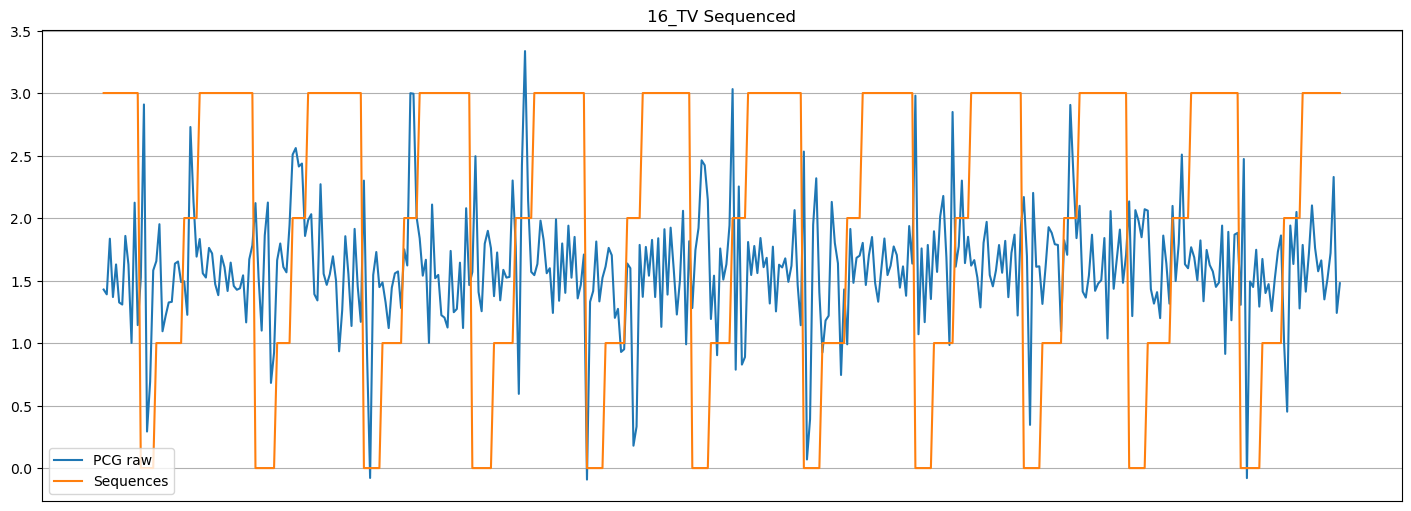

In [ ]:
plt.figure(layout='constrained', figsize=(14,5))
plt.title('16_TV Sequenced PCG')
plt.plot((pplib.min_max_norm2(pcg_df.iloc[63][2])*2 +1.5)[300:700], label = 'PCG raw')
plt.plot(pcg_state_predictions[63][300:700], label='Sequences')
plt.xticks([])
#plt.ylim(-1, 1)
plt.legend(loc=3)
plt.grid()
plt.show()

## Electrocardiography (ECG)

In [9]:
root_dir = r'..\DatasetCHVNGE\ecg_ulsge.pkl'
ecg_df = pd.read_pickle(root_dir)
# Resample them to 50 Hz
ecg_df['Signal'] = ecg_df['Signal'].apply(
    lambda data: pplib.downsample(data, 500, 50))
# Import Predictions
predictions_pickle_path = r'..\ULSGE_ecg_pred.pkl'
with open(predictions_pickle_path, 'rb') as file:
    ecg_predictions = pickle.load(file)

### Show Raw predictions

C:\Users\danie\AppData\Local\Temp\ipykernel_36244\2921940386.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(pplib.min_max_norm2(ecg_df.iloc[63][2])[300:700], label = 'ECG raw')


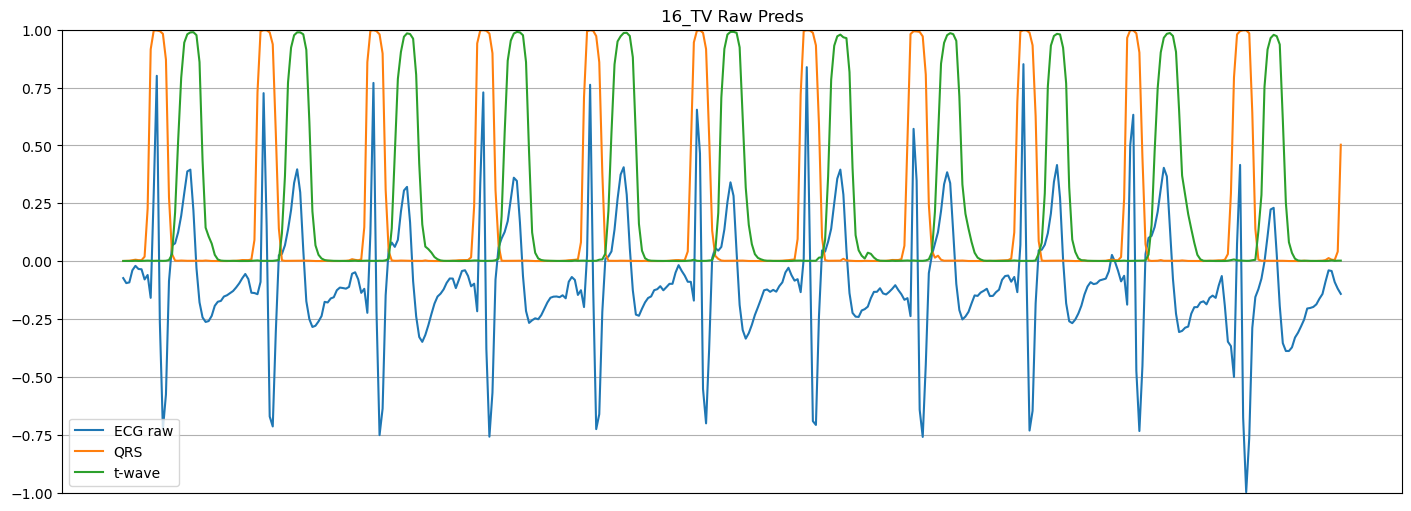

In [ ]:
plt.figure(layout='constrained', figsize=(14,5))
plt.title('16_TV Raw Preds ECG')
plt.plot(pplib.min_max_norm2(ecg_df.iloc[63][2])[300:700], label = 'ECG raw')
plt.plot(ecg_predictions[63][300:700, 2], label='QRS')
plt.plot(ecg_predictions[63][300:700, 3], label='t-wave')
plt.xticks([])
plt.ylim(-1, 1)
plt.legend(loc=3)
plt.grid()
plt.show()

### Smooth Predictions

In [11]:
AVERAGE_WINDOW = 3
ecg_processed_predictions = [
    np.column_stack([pplib.moving_average(data[:, i], AVERAGE_WINDOW) for i in range(4)])
    for data in ecg_predictions
]

In [ ]:
plt.figure(layout='constrained', figsize=(14,5))
plt.title('16_TV Smooth Preds ECG')
plt.plot(pplib.min_max_norm2(pcg_df.iloc[63][2])[300:700], label = 'ECG raw')
plt.plot(pcg_processed_predictions[63][300:700, 2], label='QRS')
plt.plot(pcg_processed_predictions[63][300:700, 3], label='t-wave')
plt.xticks([])
plt.ylim(-1, 1)
plt.legend(loc=3)
plt.grid()
plt.show()

### Reverse One-hot encoding

In [12]:
ecg_pred_labels = [ftelib.reverse_one_hot_encoding(pred) for pred in ecg_processed_predictions]
ecg_prediction_labels = copy.deepcopy(ecg_pred_labels)
ecg_state_predictions = np.array([prediction for prediction in ecg_prediction_labels], dtype=object)

C:\Users\danie\AppData\Local\Temp\ipykernel_36244\3076831664.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot((pplib.min_max_norm2(ecg_df.iloc[63][2])*2 +1.5)[300:700], label = 'ECG raw')


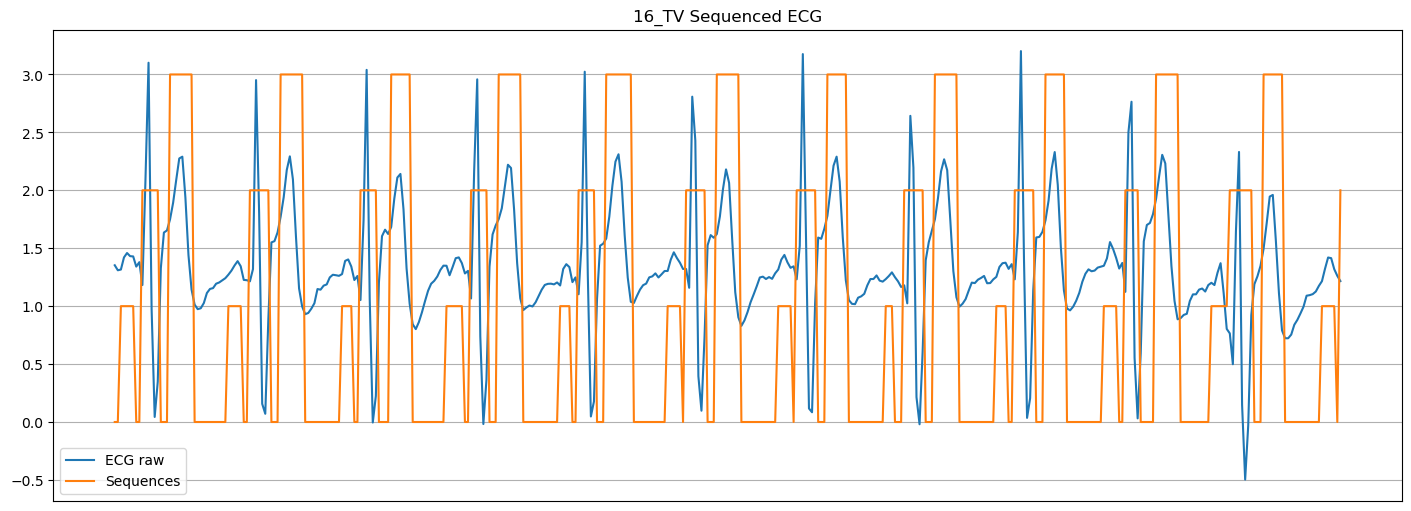

In [13]:
plt.figure(layout='constrained', figsize=(14,5))
plt.title('16_TV Sequenced ECG')
plt.plot((pplib.min_max_norm2(ecg_df.iloc[63][2])*2 +1.5)[300:700], label = 'ECG raw')
plt.plot(ecg_state_predictions[63][300:700], label='Sequences')
plt.xticks([])
plt.legend(loc=3)
plt.grid()
plt.show()

## ECG and PCG Overlapping

### Raw signals overlapping

### Probabilities overlapping

### Sequences Overlapping